In [1]:
import utils as utils
import pickle
from model import ERecogClassifier

import os

import numpy as np
import torch.nn as nn
import torch.optim as optim

In [2]:
train_acc = np.load('results/train_accuracies.npy')
train_loss = np.load('results/train_loss.npy')
val_loss = np.load('results/val_loss.npy')
val_acc = np.load('results/val_acc.npy')

augment_train_acc = np.load('results/augment_train_accuracies.npy')
augment_train_loss = np.load('results/augment_train_loss.npy')
augment_val_acc = np.load('results/augment_val_acc.npy')
augment_val_loss = np.load('results/augment_val_loss.npy')

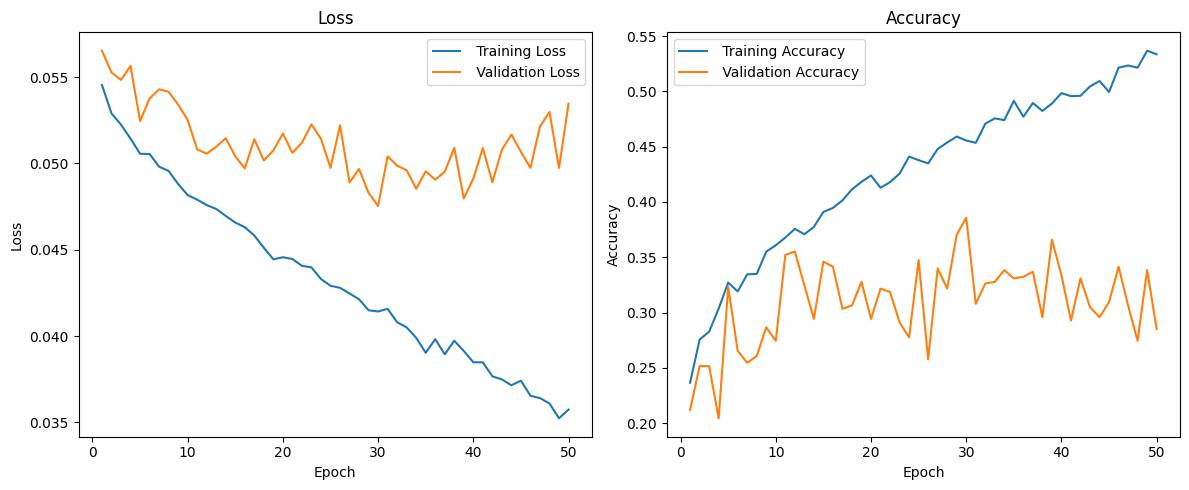

In [3]:
utils.plot_classification(train_loss,train_acc,val_loss,val_acc)

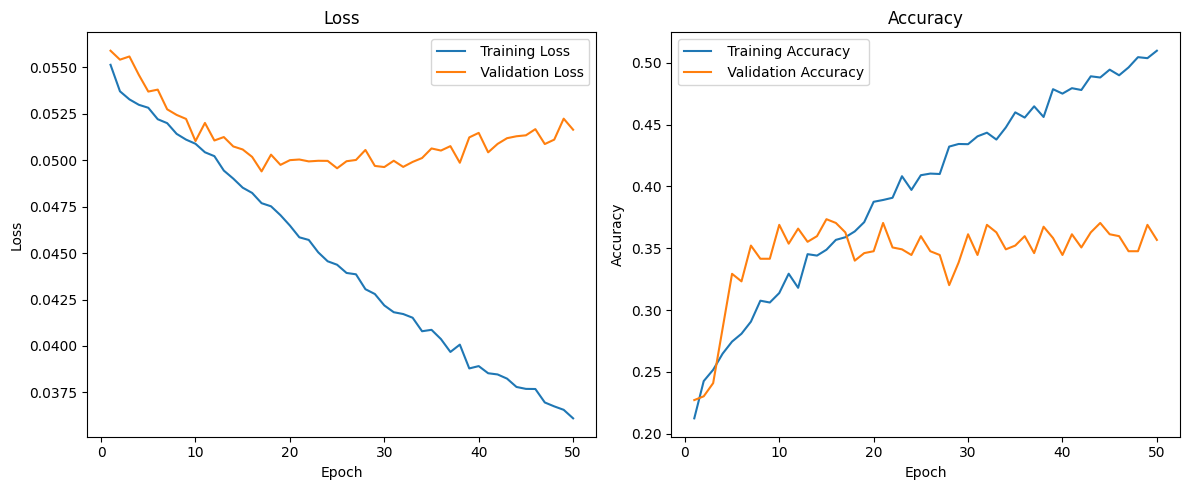

In [4]:
utils.plot_classification(augment_train_loss, augment_train_acc, augment_val_loss, augment_val_acc)

In [6]:
model = ERecogClassifier(num_classes=6)
optimizer = optim.Adam(model.parameters(), lr=5e-4)
num_epochs = 30
criterion = nn.CrossEntropyLoss()

train_loader = utils.create_data_loader('../batches/train/', batch_size= 1, shuffle=True)
val_loader = utils.create_data_loader('../batches/validation/', batch_size= 1, shuffle=True)
train_losses, train_accuracies, _, _ = utils.train_classification(model, criterion, optimizer, num_epochs, [train_loader, val_loader], None)

Running loss: 1.783455491065979
Running loss: 3.7316752672195435
Running loss: 5.704373836517334
Running loss: 7.518811583518982
Running loss: 9.457744002342224
Running loss: 11.313634157180786
Running loss: 13.10054886341095
Running loss: 14.871432304382324
Running loss: 16.669485807418823
Running loss: 18.508347034454346
Running loss: 20.293691754341125
Running loss: 22.08346438407898
Running loss: 23.866658210754395
Running loss: 25.659029126167297
Running loss: 27.47460162639618
Running loss: 29.258071303367615
Running loss: 31.039788961410522
Running loss: 32.82646977901459
Running loss: 34.61977398395538
Running loss: 36.405961871147156
Running loss: 38.18358612060547
Running loss: 39.961493372917175
Running loss: 41.74725961685181
Running loss: 43.556817412376404
Running loss: 45.36055898666382
Running loss: 47.1431587934494
Running loss: 48.94252252578735
Running loss: 50.7461576461792
Running loss: 52.52118802070618
Running loss: 54.321441531181335
Running loss: 56.10507273674

In [ ]:
os.makedirs('final_model', exist_ok=True)
with open('final_model/final.model.pickle','wb') as model_file:
     pickle.dump(model, model_file)


np.save('results/final_train_loss', train_losses)
np.save('results/final_train_accuracies', train_accuracies)